In [91]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#displayd dat
from IPython.display import display
%matplotlib inline

In [92]:
# Read data and drop redundant column.
loc = '/Users/prashanth/Downloads/DS Project/'

data = pd.read_csv(loc + 'final_dataset.csv')

# Preview data.
display(data.head())


#Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

#Input - 12 other features (fouls, shots, goals, misses,corners, red card, yellow cards)
#Output - Full Time Result (H=Home Win, D=Draw, A=Away Win) 

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2019-08-16,Ath Bilbao,Barcelona,1,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,9.0
1,1,2019-08-17,Celta,Real Madrid,1,3,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,16.0
2,2,2019-08-17,Valencia,Sociedad,1,1,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
3,3,2019-08-17,Mallorca,Eibar,2,1,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
4,4,2019-08-17,Leganes,Osasuna,0,1,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,8.0


In [93]:
data.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP',
       'AwayTeamLP', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts',
       'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

<AxesSubplot:>

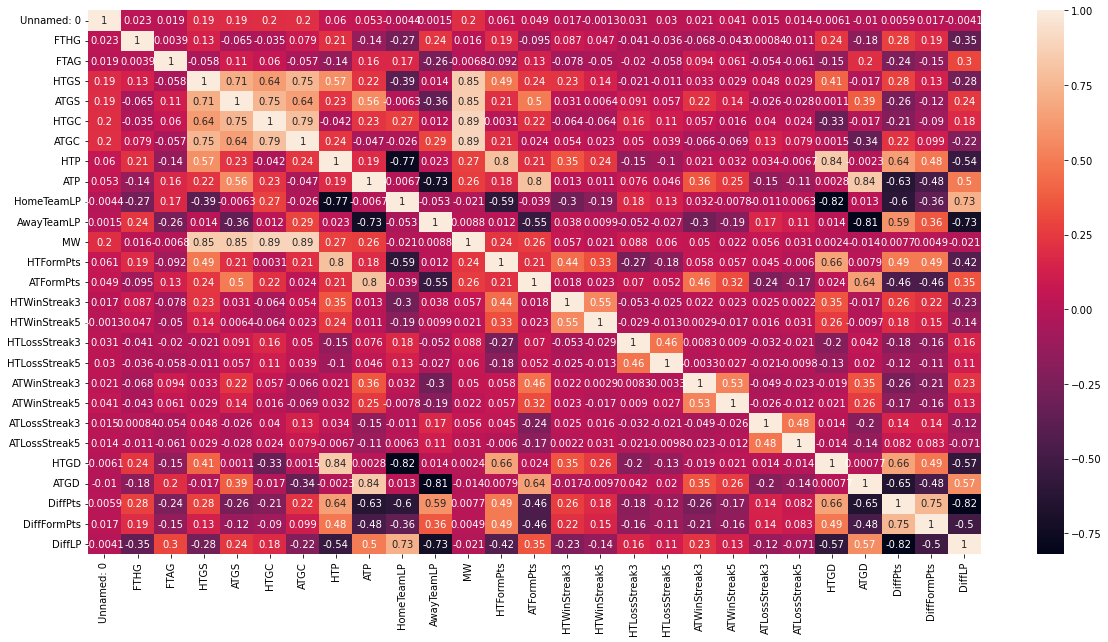

In [94]:
# Correlation Matrix for dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot= True)

In [95]:
# Remove few column
data2 = data.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [96]:
data2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HomeTeamLP', 'AwayTeamLP', 'HTGD', 'ATGD', 'DiffFormPts',
       'DiffLP'],
      dtype='object')

In [97]:
data2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HomeTeamLP,AwayTeamLP,HTGD,ATGD,DiffFormPts,DiffLP
0,0,H,0.0,0.0,M,M,M,M,M,M,11.0,2.0,0.0,0.0,0.0,9.0
1,1,NH,0.0,0.0,M,M,M,M,M,M,17.0,1.0,0.0,0.0,0.0,16.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,9.0,6.0,0.0,0.0,0.0,3.0
3,3,H,0.0,0.0,M,M,M,M,M,M,19.0,14.0,0.0,0.0,0.0,5.0
4,4,NH,0.0,0.0,M,M,M,M,M,M,18.0,10.0,0.0,0.0,0.0,8.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,5.0,7.0,0.0,0.0,0.0,-2.0
6,6,H,0.0,0.0,M,M,M,M,M,M,16.0,12.0,0.0,0.0,0.0,4.0
7,7,NH,0.0,0.0,M,M,M,M,M,M,20.0,4.0,0.0,0.0,0.0,16.0
8,8,NH,0.0,0.0,M,M,M,M,M,M,15.0,13.0,0.0,0.0,0.0,2.0
9,9,H,0.0,0.0,M,M,M,M,M,M,3.0,8.0,0.0,0.0,0.0,-5.0


In [98]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = data2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data2[data2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 1900
Number of features: 15
Number of matches won by home team: 846
Win rate of home team: 44.53%


array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATP'>,
     

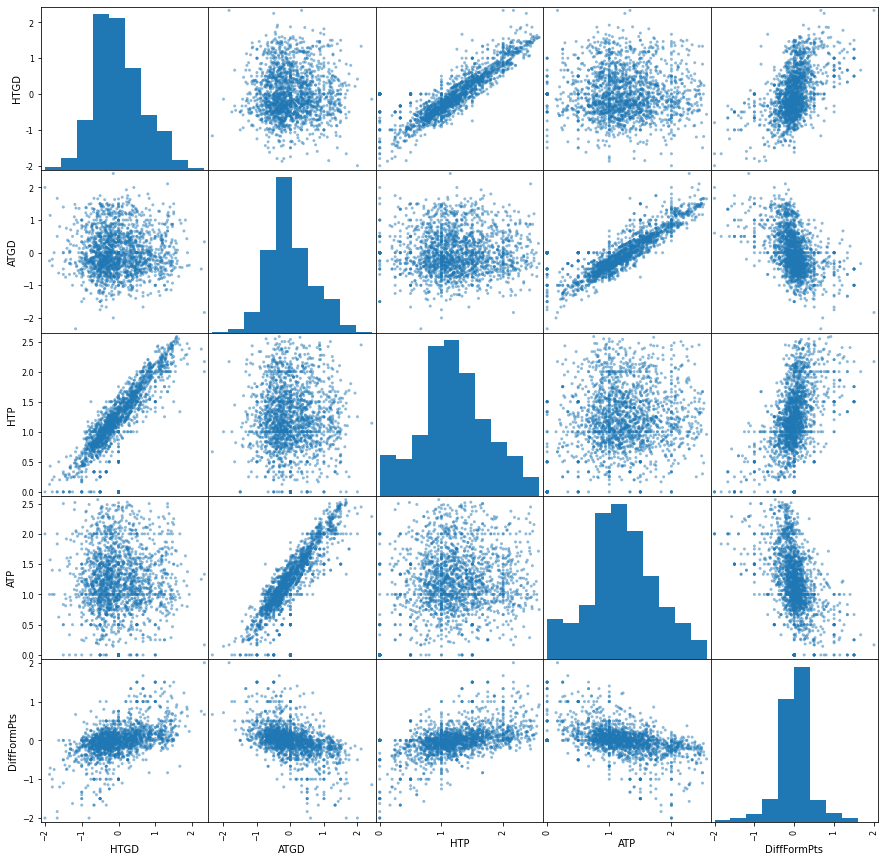

In [99]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

PREPARING THE DATA

In [119]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data2.drop(['FTR'],1)
y_all = data2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

/var/folders/jm/xjdylqtj6r764j4f_8jvwq280000gn/T/ipykernel_17378/3109573959.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_all = data2.drop(['FTR'],1)


In [101]:
 #last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))





Processed feature columns (33 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HomeTeamLP', 'AwayTeamLP', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [102]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM3_D,AM3_L,AM3_M,AM3_W,HomeTeamLP,AwayTeamLP,HTGD,ATGD,DiffFormPts,DiffLP
0,0,-2.212444,-2.248602,0,0,1,0,0,0,1,...,0,0,1,0,11.0,2.0,-0.005202,-0.015439,0.0,9.0
1,1,-2.212444,-2.248602,0,0,1,0,0,0,1,...,0,0,1,0,17.0,1.0,-0.005202,-0.015439,0.0,16.0
2,2,-2.212444,-2.248602,0,0,1,0,0,0,1,...,0,0,1,0,9.0,6.0,-0.005202,-0.015439,0.0,3.0
3,3,-2.212444,-2.248602,0,0,1,0,0,0,1,...,0,0,1,0,19.0,14.0,-0.005202,-0.015439,0.0,5.0
4,4,-2.212444,-2.248602,0,0,1,0,0,0,1,...,0,0,1,0,18.0,10.0,-0.005202,-0.015439,0.0,8.0


Spliting the dataset

In [103]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

Applying the Logistic Regression

In [104]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [105]:
Y_pred = classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)


<AxesSubplot:>

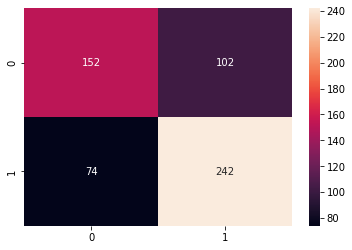

In [107]:
sns.heatmap(cm, annot=True,fmt='d')

In [108]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.67      0.60      0.63       254
          NH       0.70      0.77      0.73       316

    accuracy                           0.69       570
   macro avg       0.69      0.68      0.68       570
weighted avg       0.69      0.69      0.69       570



Confusion Matrix with polynomial features:
 [[148 106]
 [ 66 250]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


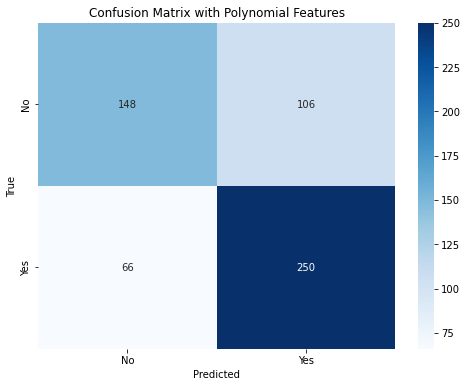

In [109]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_all)

# Split and train with polynomial features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_all, test_size=0.3, random_state=2, stratify=y_all)
classifier.fit(X_train, y_train)
Y_pred_poly = classifier.predict(X_test)

# Evaluate
cm_poly = confusion_matrix(y_test, Y_pred_poly)
print("Confusion Matrix with polynomial features:\n", cm_poly)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Polynomial Features')
plt.show()


Applying the SVM

In [110]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [111]:
#predicting result
Y_pred = classifier.predict(X_test)

In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<AxesSubplot:>

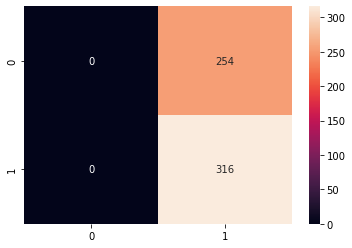

In [113]:
sns.heatmap(cm, annot=True, fmt='d')

In [114]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       254
          NH       0.55      1.00      0.71       316

    accuracy                           0.55       570
   macro avg       0.28      0.50      0.36       570
weighted avg       0.31      0.55      0.40       570



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Applying the XGBoost

In [115]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the labels to numeric values
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Now fit the XGBoost model with the encoded labels
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train_encoded)

# Predict the results
y_pred = classifier.predict(X_test)

# Optionally, you can inverse transform the predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)

# Print the classification report with original labels
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           H       0.62      0.57      0.59       254
          NH       0.68      0.72      0.70       316

    accuracy                           0.65       570
   macro avg       0.65      0.64      0.65       570
weighted avg       0.65      0.65      0.65       570



<AxesSubplot:>

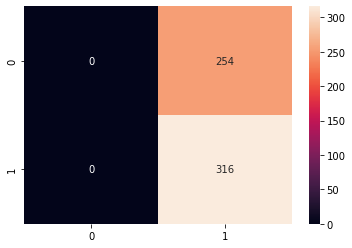

In [116]:
sns.heatmap(cm, annot=True,fmt='d')

Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.

Tuning the parameters of XGBoost.

In [117]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Parameters to tune
parameters = {
    'learning_rate': [0.1],
    'n_estimators': [40],
    'max_depth': [3],
    'min_child_weight': [3],
    'gamma': [0.4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1],
    'reg_alpha': [1e-5]
}

# Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# Make an f1 scoring function using 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label=1)  # Change pos_label to 1

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, scoring=f1_scorer, param_grid=parameters, cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train_encoded)

# Get the best estimator
clf = grid_obj.best_estimator_
print(clf)

# Define predict_labels function
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score and accuracy. '''
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train_encoded)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1, acc))

f1, acc = predict_labels(clf, X_test, y_test_encoded)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1, acc))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
F1 score and accuracy score for training set: 0.7982 , 0.7677.
F1 score and accuracy score for test set: 0.7357 , 0.6912.


In [118]:
from time import time
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

def predict_labels(clf, features, target_encoded, pos_label):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target_encoded, y_pred, pos_label=pos_label), sum(target_encoded == y_pred) / float(len(y_pred))

def train_predict(clf, X_train, y_train, X_test, y_test, pos_label):
    ''' Train and predict using a classifier based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}...".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train, pos_label)
    print("Training F1 score and accuracy: {:.4f}, {:.4f}.".format(f1, acc))
    
    f1, acc = predict_labels(clf, X_test, y_test, pos_label)
    print("Testing F1 score and accuracy: {:.4f}, {:.4f}.".format(f1, acc))

# Sample data setup (replace with your actual data loading)
# X_train, X_test, y_train, y_test = ...

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
pos_label_encoded = label_encoder.transform(['H'])[0]  # Get the encoded value for 'H'

# Initialize the classifiers
clf_A = LogisticRegression(random_state=42)
clf_B = SVC(random_state=912, kernel='rbf')
clf_C = xgb.XGBClassifier(seed=82)

# Train and evaluate models
train_predict(clf_A, X_train, y_train_encoded, X_test, y_test_encoded, pos_label_encoded)
print('')
train_predict(clf_B, X_train, y_train_encoded, X_test, y_test_encoded, pos_label_encoded)
print('')
train_predict(clf_C, X_train, y_train_encoded, X_test, y_test_encoded, pos_label_encoded)
print('')


Training a LogisticRegression using a training set size of 1330...
Trained model in 0.0501 seconds
Made predictions in 0.0006 seconds.
Training F1 score and accuracy: 0.6341, 0.6955.
Made predictions in 0.0003 seconds.
Testing F1 score and accuracy: 0.6325, 0.6982.

Training a SVC using a training set size of 1330...


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained model in 0.2759 seconds
Made predictions in 0.4229 seconds.
Training F1 score and accuracy: 0.0000, 0.5549.
Made predictions in 0.1813 seconds.
Testing F1 score and accuracy: 0.0000, 0.5544.

Training a XGBClassifier using a training set size of 1330...
Trained model in 0.5328 seconds
Made predictions in 0.0041 seconds.
Training F1 score and accuracy: 1.0000, 1.0000.
Made predictions in 0.0018 seconds.
Testing F1 score and accuracy: 0.5943, 0.6526.

